# Задание 1

### Подготовка датасета для проверки работы, можно использовать любые другие входные данные

In [ ]:
from google.colab import files
files.upload()

Saving train.csv to train.csv


{'train.csv': b'PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked\r\n1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,,S\r\n2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C\r\n3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,,S\r\n4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S\r\n5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,,S\r\n6,0,3,"Moran, Mr. James",male,,0,0,330877,8.4583,,Q\r\n7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S\r\n8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,,S\r\n9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,,S\r\n10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,,C\r\n11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7,G6,S\r\n12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S\r\

### Мы взяли титаник

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn import svm
from sklearn.svm import SVC

In [ ]:
titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [ ]:
ports = pd.get_dummies(titanic.Embarked, prefix='Embarked')
ports.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
titanic = titanic.join(ports)
titanic.drop(['Embarked'], axis=1, inplace=True)

In [ ]:
titanic.Sex = titanic.Sex.map({'male': 0, 'female': 1})

In [ ]:
titanic[pd.isnull(titanic).any(axis=1)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
5,0,3,0,NaN,0,0,8.4583,0,1,0
17,1,2,0,NaN,0,0,13.0000,0,0,1
19,1,3,1,NaN,0,0,7.2250,1,0,0
26,0,3,0,NaN,0,0,7.2250,1,0,0
28,1,3,1,NaN,0,0,7.8792,0,1,0
...,...,...,...,...,...,...,...,...,...,...
859,0,3,0,NaN,0,0,7.2292,1,0,0
863,0,3,1,NaN,8,2,69.5500,0,0,1
868,0,3,0,NaN,0,0,9.5000,0,0,1
878,0,3,0,NaN,0,0,7.8958,0,0,1


In [ ]:
titanic.Age.fillna(titanic.Age.mean(), inplace=True)

In [ ]:
y = titanic.Survived.copy()
X = titanic.drop(['Survived'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

![image.png](attachment:image.png)

In [ ]:
model = LogisticRegression(max_iter = 10000, penalty = 'none')
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, penalty='none')

In [ ]:
y_pred = pd.Series(model.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head()

,True,Prediction
0,1,1
1,0,0
2,0,1
3,0,0
4,0,0


In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8156424581005587
Precision: 0.7424242424242424
Recall: 0.7538461538461538


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       114
           1       0.74      0.75      0.75        65

    accuracy                           0.82       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



Text(0.5, 15.0, 'Predicted')

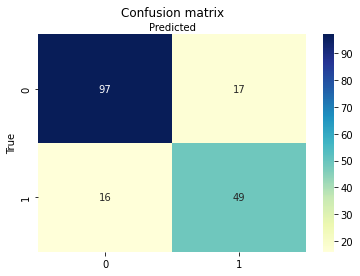

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

In [ ]:
# графики кривых обучения
def plot_(estimator,title, X, y, train_sizes=np.linspace(0.1, 1.0, 5)):

    _, axes = plt.subplots(1, 2, figsize=(25, 10)) 
    axes[0].set_title(title)
    axes[0].set_xlabel("training examples")
    axes[0].set_ylabel("score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(estimator,X,y,train_sizes=train_sizes, 
                                                                                            return_times=True)                                                                   
    train_sc_mean = np.mean(train_scores, axis=1)
    train_sc_std = np.std(train_scores, axis=1)
    test_sc_mean = np.mean(test_scores, axis=1)
    test_sc_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    #график кривой обучения
    axes[0].grid()
    axes[0].fill_between(train_sizes,train_sc_mean - train_sc_std, train_sc_mean + train_sc_std, alpha=0.05, color="b")
    axes[0].fill_between(train_sizes, test_sc_mean - test_sc_std, test_sc_mean + test_sc_std, alpha=0.05, color="y")
    axes[0].plot(train_sizes, train_sc_mean, "o-", color="b", label="training score")
    axes[0].plot(train_sizes, test_sc_mean, "o-", color="y", label="cross-validation score")

    #график результатов / повторов
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-",color="b",)
    axes[1].fill_between(train_sizes,fit_times_mean - fit_times_std,fit_times_mean + fit_times_std, alpha=0.05,color="b")
    axes[1].set_xlabel("training examples")
    axes[1].set_ylabel("fit times")
    axes[1].set_title("scalability")

    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

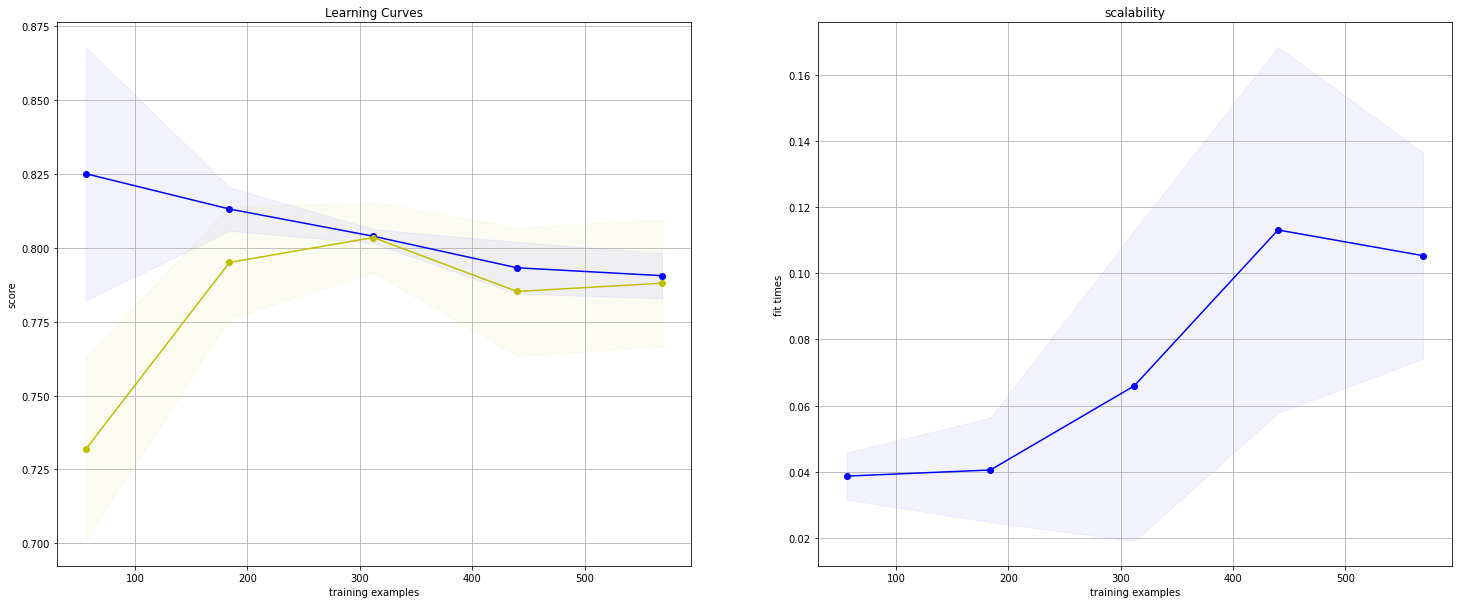

In [ ]:
title = "Learning Curves"
estimator = model
plot_(estimator, title, X=X_train, y=y_train)

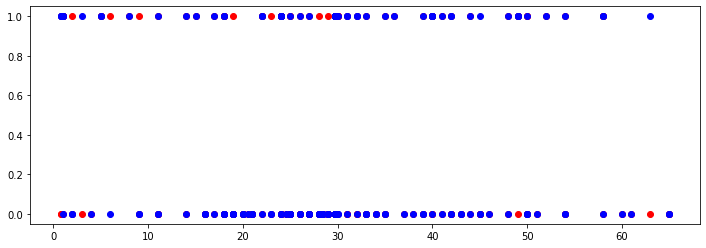

In [ ]:
# Визуализация верных и неверных значений классификации
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(np.array(X_test['Age']),y_pred, color = 'red')
ax.scatter(np.array(X_test['Age']), np.array(y_test), color = 'blue')
plt.show()

![image.png](attachment:image.png)

In [ ]:
# базисные функции(параметр solver): newton-cg, lbfgs, liblinear, sag, saga
# newton-cg - ['l2', 'none']
# lbfgs - ['l2', 'none']
# liblinear - ['l1', 'l2']
# sag - ['l2', 'none']
# saga - ['elasticnet', 'l1', 'l2', 'none']

In [ ]:
model_2 = LogisticRegression(max_iter = 10000, solver = 'newton-cg')
model_2.fit(X_train, y_train)

LogisticRegression(max_iter=10000, solver='newton-cg')

In [ ]:
y_pred = pd.Series(model_2.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head()

,True,Prediction
0,1,1
1,0,0
2,0,1
3,0,0
4,0,0


In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8156424581005587
Precision: 0.7352941176470589
Recall: 0.7692307692307693


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       114
           1       0.74      0.77      0.75        65

    accuracy                           0.82       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.82      0.82       179



Text(0.5, 15.0, 'Predicted')

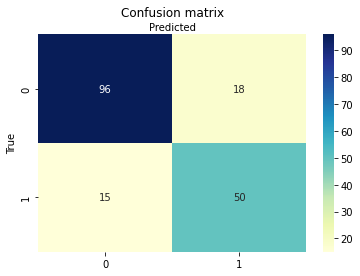

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

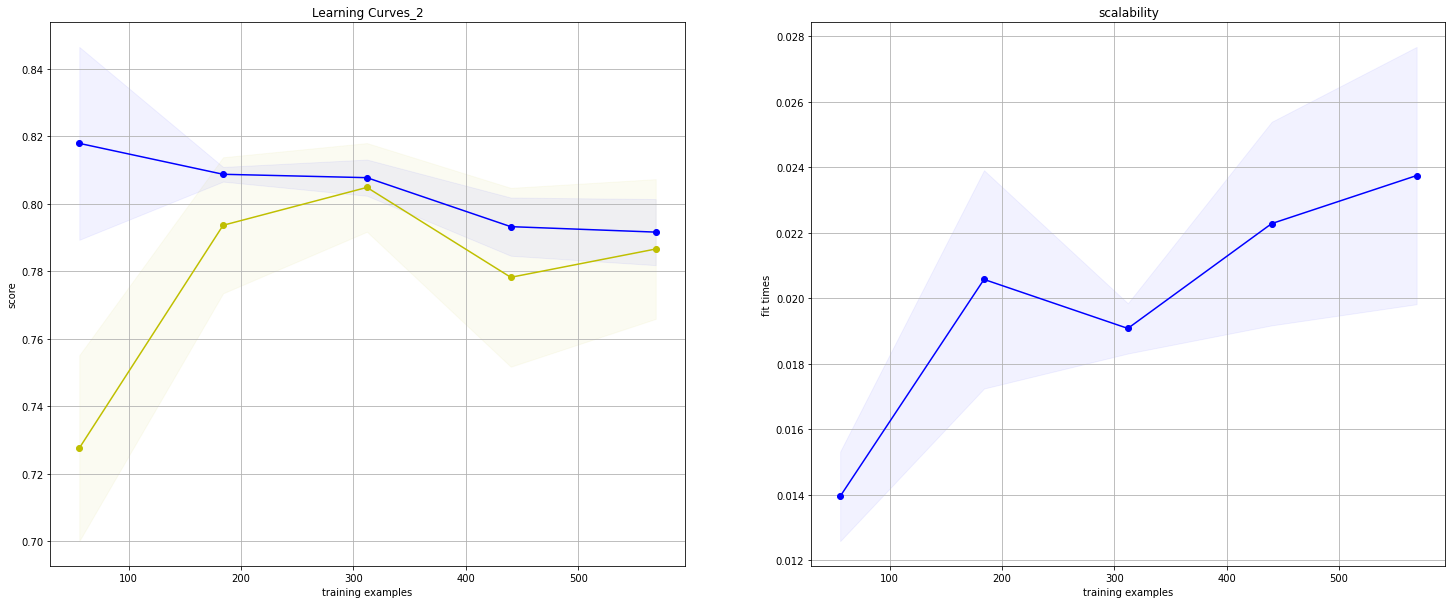

In [ ]:
title = "Learning Curves_2"
estimator = model_2
plot_(estimator, title, X=X_train, y=y_train)

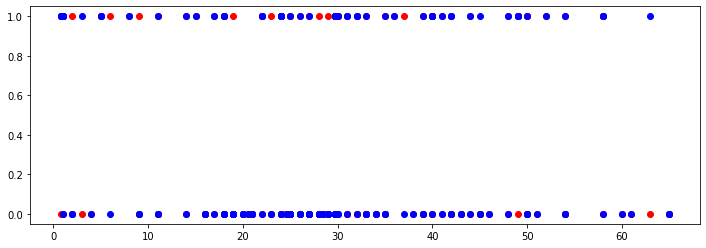

In [ ]:
# Визуализация верных и неверных значений классификации
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(np.array(X_test['Age']),y_pred, color = 'red')
ax.scatter(np.array(X_test['Age']), np.array(y_test), color = 'blue')
plt.show()

![image.png](attachment:image.png)

In [ ]:
# базисные функции liblinear, saga
# регуляризация l1

In [ ]:
model_3 = LogisticRegression(max_iter = 10000, solver = 'liblinear', penalty = 'l1')
model_3.fit(X_train, y_train)

LogisticRegression(max_iter=10000, penalty='l1', solver='liblinear')

In [ ]:
y_pred = pd.Series(model_3.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head()

,True,Prediction
0,1,1
1,0,0
2,0,1
3,0,0
4,0,0


In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.8268156424581006
Precision: 0.765625
Recall: 0.7538461538461538


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       114
           1       0.77      0.75      0.76        65

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



Text(0.5, 15.0, 'Predicted')

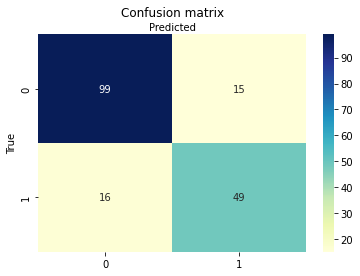

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

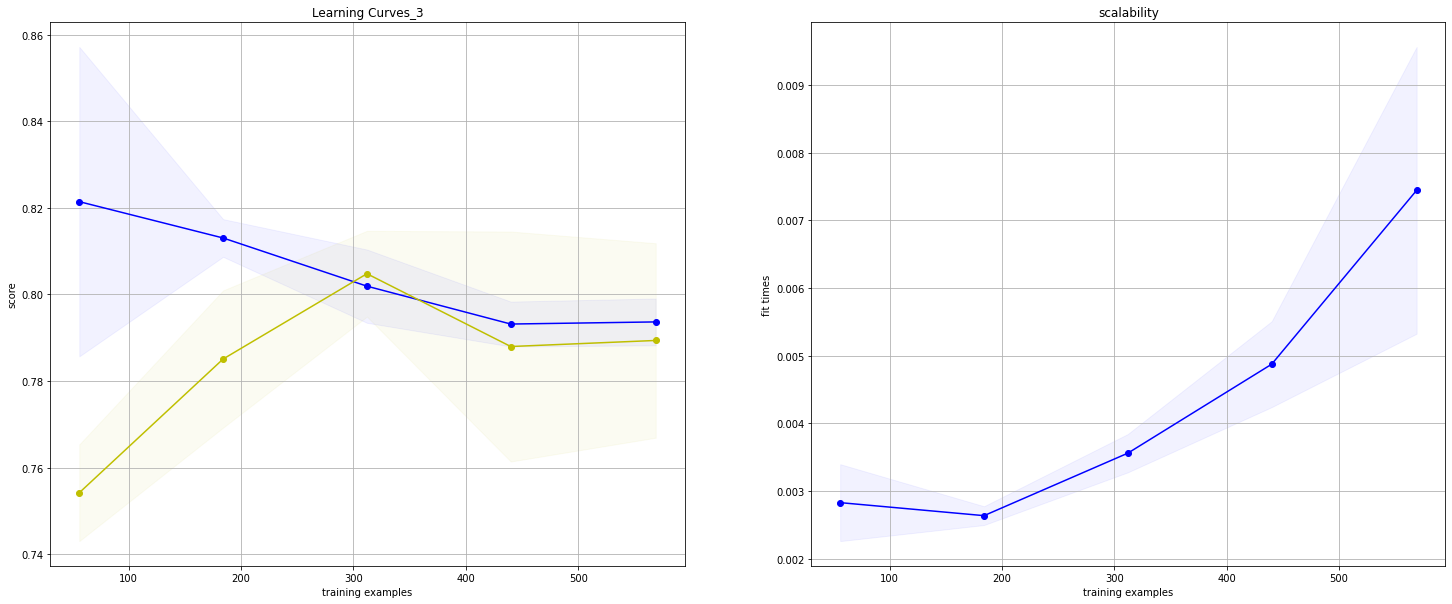

In [ ]:
title = "Learning Curves_3"
estimator = model_3
plot_(estimator, title, X=X_train, y=y_train)

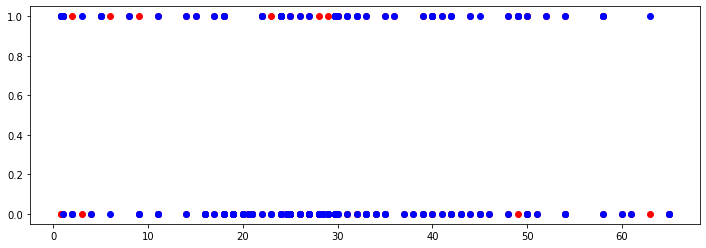

In [ ]:
# Визуализация верных и неверных значений классификации
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(np.array(X_test['Age']),y_pred, color = 'red')
ax.scatter(np.array(X_test['Age']), np.array(y_test), color = 'blue')
plt.show()

![image.png](attachment:image.png)

In [ ]:
# Прямой метод опорных векторов
model_4 = svm.SVC()
model_4.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = pd.Series(model_4.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head()

,True,Prediction
0,1,0
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.7262569832402235
Precision: 0.7222222222222222
Recall: 0.4


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.91      0.81       114
           1       0.72      0.40      0.51        65

    accuracy                           0.73       179
   macro avg       0.72      0.66      0.66       179
weighted avg       0.73      0.73      0.70       179



Text(0.5, 15.0, 'Predicted')

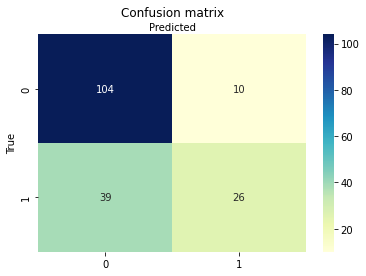

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

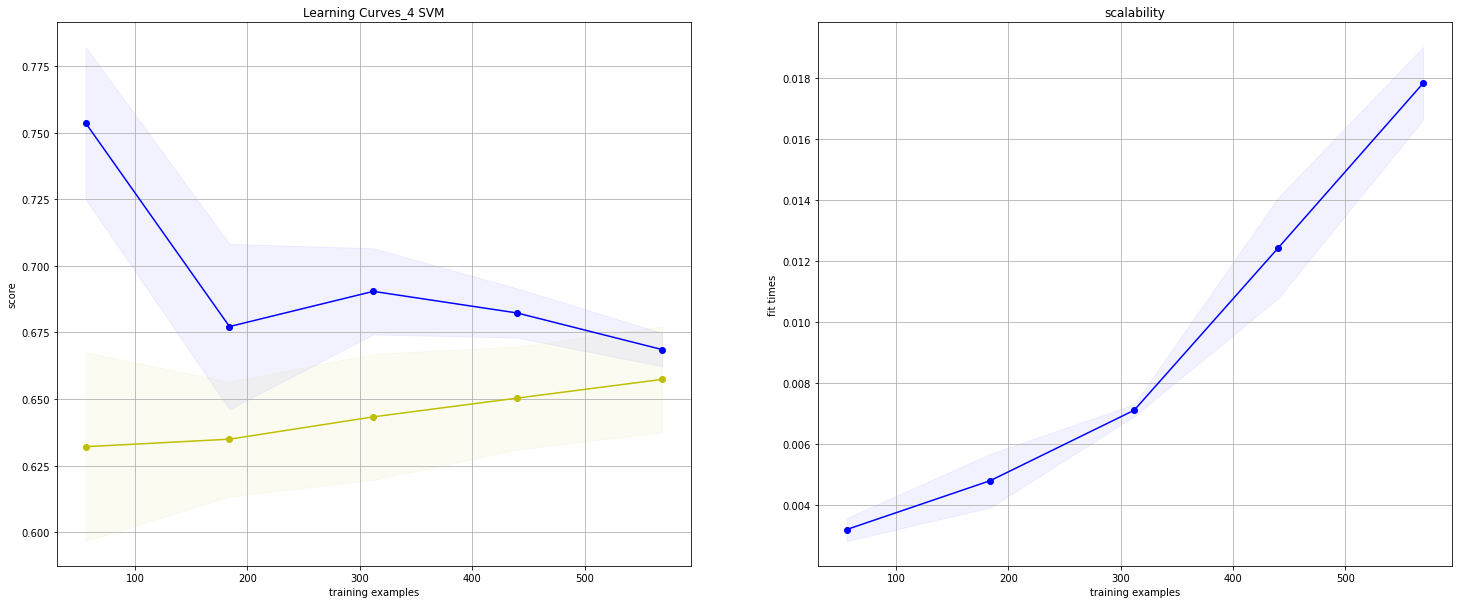

In [ ]:
title = "Learning Curves_4 SVM"
estimator = model_4
plot_(estimator, title, X=X_train, y=y_train)

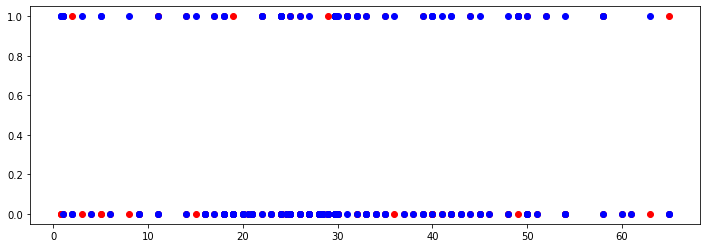

In [ ]:
# Визуализация верных и неверных значений классификации
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(np.array(X_test['Age']),y_pred, color = 'red')
ax.scatter(np.array(X_test['Age']), np.array(y_test), color = 'blue')
plt.show()

![image.png](attachment:image.png)

In [ ]:
# Прямой метод опорных векторов
model_5 = svm.SVC(kernel='rbf', gamma = 0.001, C = 1)
model_5.fit(X_train, y_train)

SVC(C=1, gamma=0.001)

In [ ]:
y_pred = pd.Series(model_5.predict(X_test))
y_test = y_test.reset_index(drop=True)
z = pd.concat([y_test, y_pred], axis=1)
z.columns = ['True', 'Prediction']
z.head()

,True,Prediction
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0


In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))

Accuracy: 0.7206703910614525
Precision: 0.6363636363636364
Recall: 0.5384615384615384


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       114
           1       0.64      0.54      0.58        65

    accuracy                           0.72       179
   macro avg       0.70      0.68      0.69       179
weighted avg       0.71      0.72      0.71       179



Text(0.5, 15.0, 'Predicted')

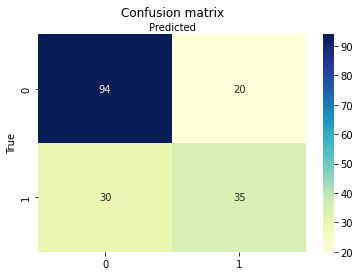

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

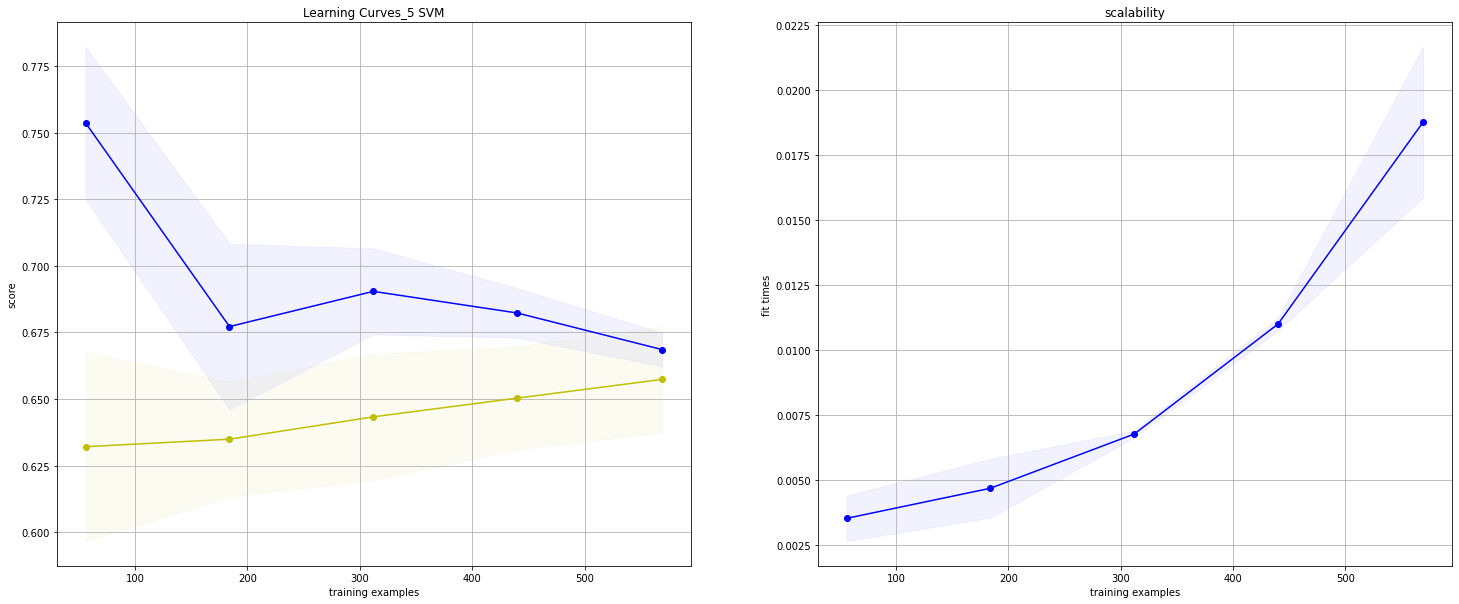

In [ ]:
title = "Learning Curves_5 SVM"
estimator = model_4
plot_(estimator, title, X=X_train, y=y_train)

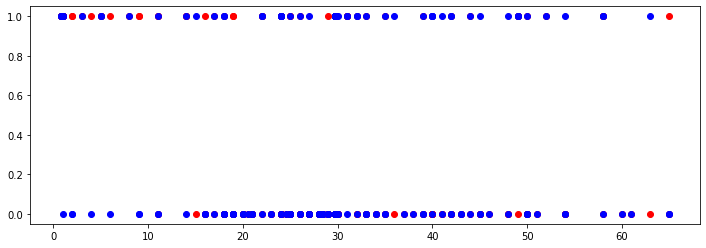

In [ ]:
# Визуализация верных и неверных значений классификации
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(np.array(X_test['Age']),y_pred, color = 'red')
ax.scatter(np.array(X_test['Age']), np.array(y_test), color = 'blue')
plt.show()

# Тест

In [ ]:
import time

--- 1.815455675125122 seconds ---


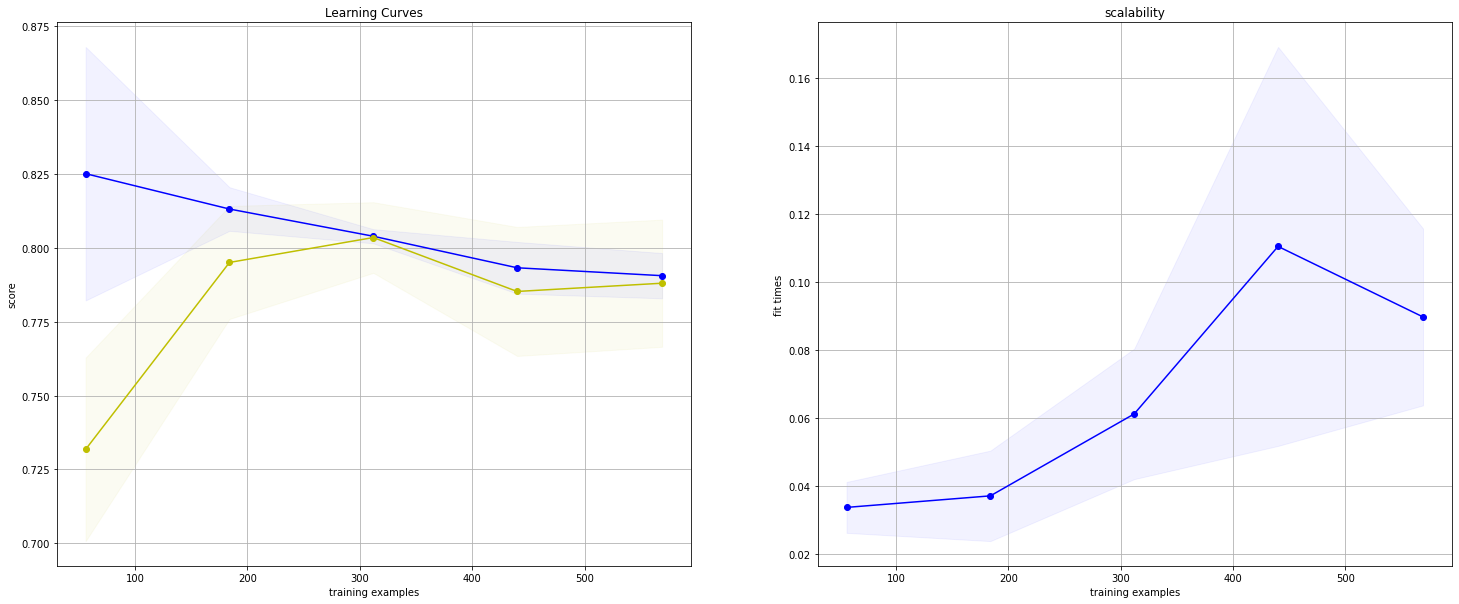

In [ ]:
start_time = time.time()
title = "Learning Curves"
estimator = model
plot_(estimator, title, X=X_train, y=y_train)
print("--- %s seconds ---" % (time.time() - start_time)) # время работы

--- 0.6858060359954834 seconds ---


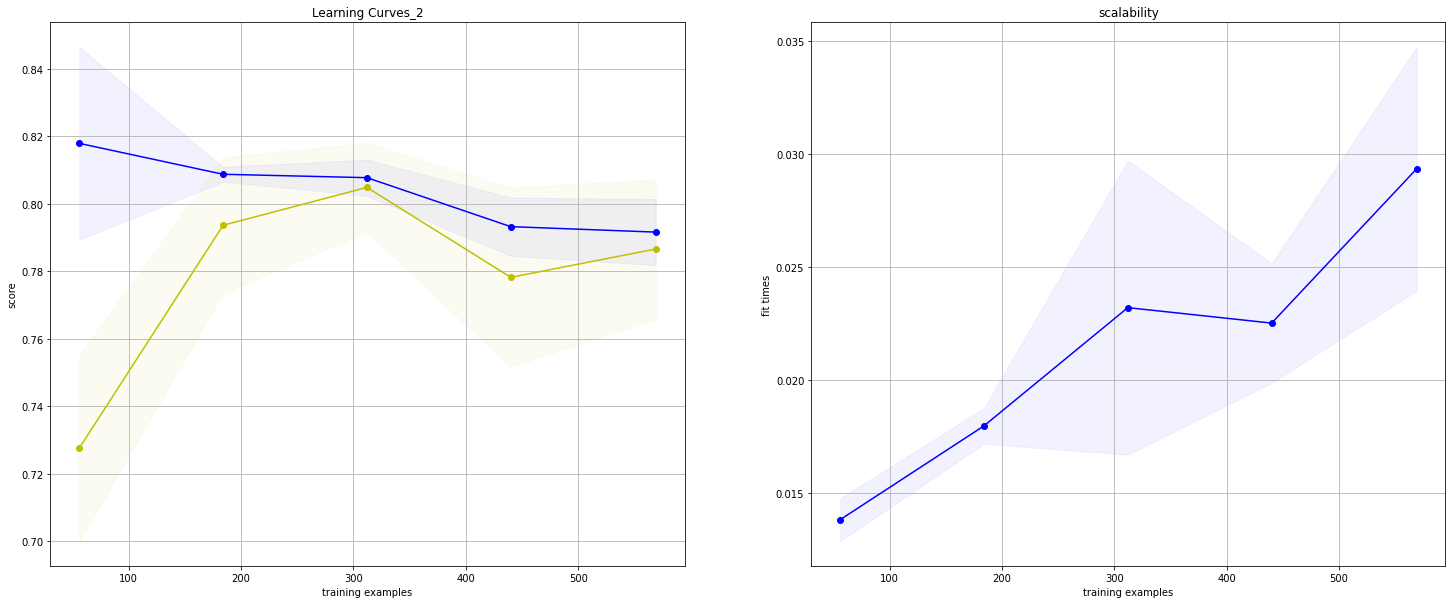

In [ ]:
start_time = time.time()
title = "Learning Curves_2"
estimator = model_2
plot_(estimator, title, X=X_train, y=y_train)
print("--- %s seconds ---" % (time.time() - start_time)) # время работы

--- 0.23809504508972168 seconds ---


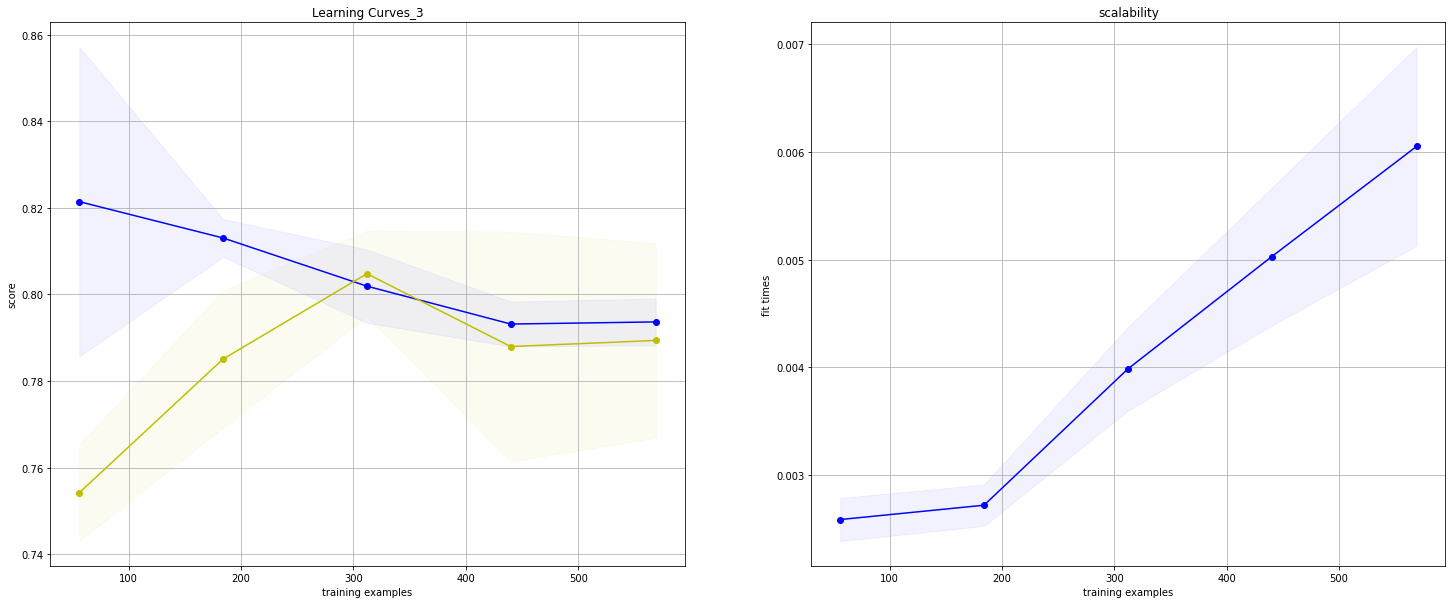

In [ ]:
start_time = time.time()
title = "Learning Curves_3"
estimator = model_3
plot_(estimator, title, X=X_train, y=y_train)
print("--- %s seconds ---" % (time.time() - start_time)) # время работы

--- 0.6717925071716309 seconds ---


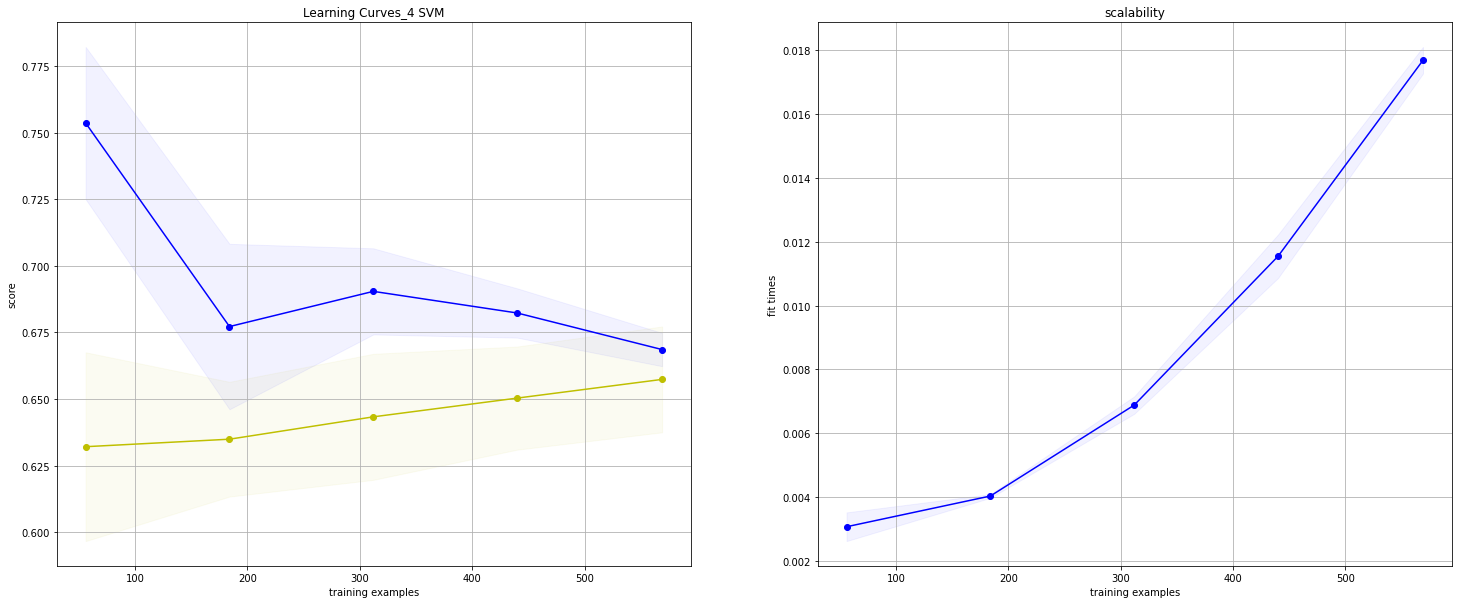

In [ ]:
start_time = time.time()
title = "Learning Curves_4 SVM"
estimator = model_4
plot_(estimator, title, X=X_train, y=y_train)
print("--- %s seconds ---" % (time.time() - start_time)) # время работы

--- 0.7683455944061279 seconds ---


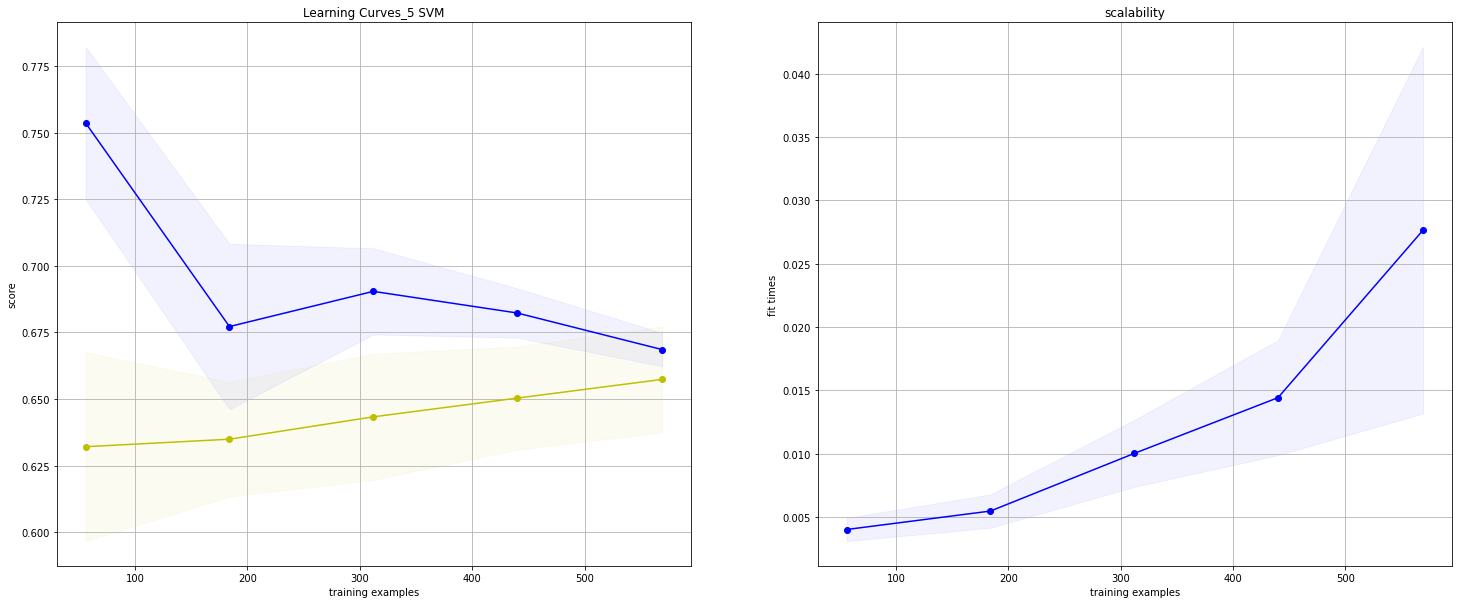

In [ ]:
start_time = time.time()
title = "Learning Curves_5 SVM"
estimator = model_4
plot_(estimator, title, X=X_train, y=y_train)
print("--- %s seconds ---" % (time.time() - start_time)) # время работы